In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Conv2D, Dense, Flatten, Dropout
from keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
print("x_train.shape: ",x_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train.shape:  (60000, 28, 28)


CNN expects a 3D input for the Conv operations

But the images we have at the moment are 2d greyscale images

so we need to expand_dimensions

-1 means the new axis is added to the end

1 would add the new axis in the beginning

In [4]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


Number of unique features that we need to study

In [5]:
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [6]:
i  = Input(shape = x_train[0].shape)    #shape of input will be the shape of the first image in the training set


In [7]:
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)

In [8]:
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

In [9]:
model = Model(i,x)

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
r = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 25s 7ms/step - loss: 0.5223 - accuracy: 0.8073 - val_loss: 0.4051 - val_accuracy: 0.8484
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3642 - accuracy: 0.8615 - val_loss: 0.3676 - val_accuracy: 0.8631
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3157 - accuracy: 0.8809 - val_loss: 0.3145 - val_accuracy: 0.8848
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2816 - accuracy: 0.8931 - val_loss: 0.3179 - val_accuracy: 0.8814
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2579 - accuracy: 0.9026 - val_loss: 0.3088 - val_accuracy: 0.8909
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2362 - accuracy: 0.9105 - val_loss: 0.2891 - val_accuracy: 0.8987
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2181 - accuracy: 0.9165 - val_loss: 0.2981 - val_accuracy

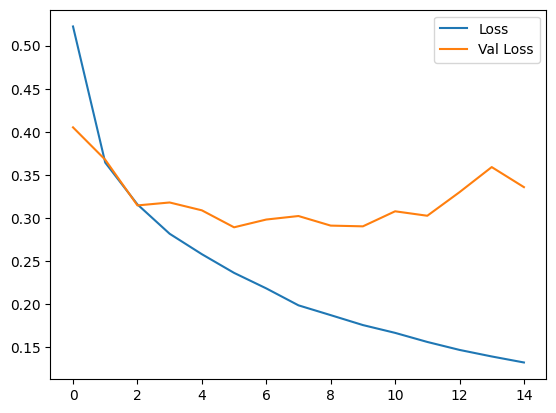

In [11]:
plt.plot(r.history['loss'],label = "Loss")
plt.plot(r.history['val_loss'],label = "Val Loss")
plt.legend()

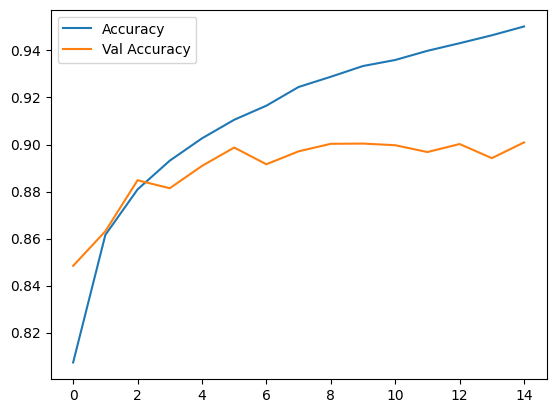

In [12]:
plt.plot(r.history['accuracy'], label = "Accuracy")
plt.plot(r.history['val_accuracy'], label = "Val Accuracy")
plt.legend()

In [13]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

313/313 [==============================] - 1s 2ms/step
Didnt normalize confusion matrix
[[851   1  20  19   3   0  99   0   7   0]
 [  4 973   1  11   5   0   2   0   4   0]
 [ 20   0 863   7  48   0  60   0   2   0]
 [ 17   5  21 899  38   0  16   0   4   0]
 [  1   1  67  28 840   1  61   0   1   0]
 [  1   0   0   0   0 979   0  14   0   6]
 [103   0  75  22  86   1 703   0  10   0]
 [  0   0   0   0   0  11   0 968   0  21]
 [  1   0   1   6   3   2   8   3 974   2]
 [  1   0   0   0   0   5   0  34   1 959]]


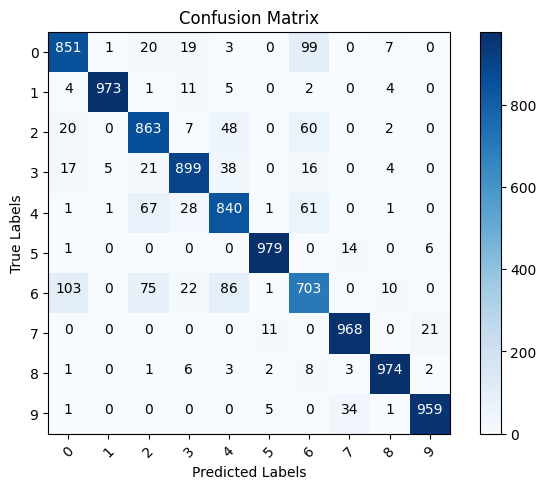

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_cf_matrix(cm, classes,normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Didnt normalize confusion matrix")

  print(cm)
  plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2


  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt,),horizontalalignment = 'center',
    color = 'white' if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Labels")
  plt.xlabel("Predicted Labels")
  plt.show()

p_test = model.predict(x_test).argmax(axis =1)
cm = confusion_matrix(y_test, p_test)
plot_cf_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True: Coat Prediction: Shirt')

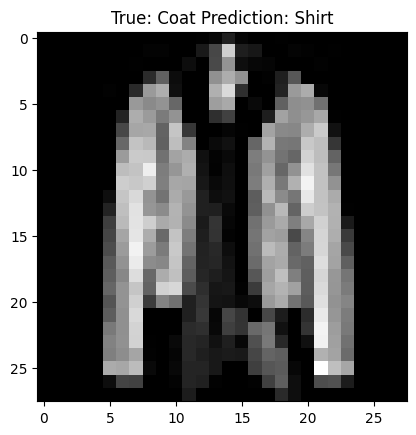

In [16]:
misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title(f"True: {labels[y_test[i]]} Prediction: {labels[p_test[i]]}")